# SeatGeek rankings

In this python notebook, I explore the question "What is the state that has best venue scores on average?"
We can answer this question with relative ease thanks to SeatGeek public API. We can get the venues information by running the following api request:

```
http://api.seatgeek.com/2/venues
```

We can know how many venues are registered in SeatGeek public api by examining the meta data that comes in the response of the previous request. A simple way for loading the response into a nice JSON using python is:

In [1]:
import urllib2
import json
import pandas as pd
import numpy as np

response = urllib2.urlopen('http://api.seatgeek.com/2/venues?per_page=1000&page=1')
data = json.load(response)
data = pd.io.json.json_normalize(data)
print data['meta.total']
print data['venues']

0    61670
Name: meta.total, dtype: int64
0    [{u'city': u'Arlington', u'stats': {u'event_co...
Name: venues, dtype: object


So we can now see how many venues are registered in SeatGeek public api. Now, we want to group all the venue scores by state. This can be done using pandas. First, we need  a dictionary to hold the statistics for each state. We do this by defining a dictionary as follows:

In [2]:
venue_states = {u'AK':[],u'AL':[],u'AZ':[],u'AR':[],u'CA':[],u'CO':[],u'CT':[],u'DE':[],u'FL':[],u'GA':[],u'HI':[],u'ID':[],u'IL':[],
u'IN':[],u'IA':[],u'KS':[],u'KY':[],u'LA':[],u'ME':[],u'MD':[],u'MA':[],u'MI':[],u'MN':[],u'MS':[],u'MO':[],u'MT':[],u'NE':[],u'NV':[],
u'NH':[],u'NJ':[],u'NM':[],u'NY':[],u'NC':[],u'ND':[],u'OH':[],u'OK':[],u'OR':[],u'PA':[],u'RI':[],u'SC':[],u'SD':[],u'TN':[],u'TX':[],u'UT':[],
u'VT':[],u'VA':[],u'WA':[],u'WV':[],u'WI':[],u'WY':[]}

venue_state_scores = {u'AK':0,u'AL':0,u'AZ':0,u'AR':0,u'CA':0,u'CO':0,u'CT':0,u'DE':0,u'FL':0,u'GA':0,u'HI':0,u'ID':0,u'IL':0,
u'IN':0,u'IA':0,u'KS':0,u'KY':0,u'LA':0,u'ME':0,u'MD':0,u'MA':0,u'MI':0,u'MN':0,u'MS':0,u'MO':0,u'MT':0,u'NE':0,u'NV':0,
u'NH':0,u'NJ':0,u'NM':0,u'NY':0,u'NC':0,u'ND':0,u'OH':0,u'OK':0,u'OR':0,u'PA':0,u'RI':0,u'SC':0,u'SD':0,u'TN':0,u'TX':0,u'UT':0,
u'VT':0,u'VA':0,u'WA':0,u'WV':0,u'WI':0,u'WY':0}

Now, we can group by ```country``` and ```state``` and add the corresponding scores to our dictionary ```venue_states```

In [3]:
venues = pd.io.json.json_normalize(data['venues'][0])

for state in venues.groupby('state').groups.keys():
    if state in venue_states:
        venue_states[state] += venues.groupby('state').groups[state]


Now, we can find the scores for each venue by using the list of ids we have for every ```state -> id``` mapping we have encoded in our ```venue_states``` dictionary.

In [4]:
for state in venue_states:
    if len(venue_states[state]) == 0:
        pass
    else:
        scores = []
        for elem in venue_states[state]:
            scores.append(venues['score'][elem])
        
        venue_state_scores[state] = np.average(scores)

Now we have our desired results in ```venue_state_scores```. Now, we attempt to visualize this data using histograms. We will only show the top 10 states to not clutter the histogram.

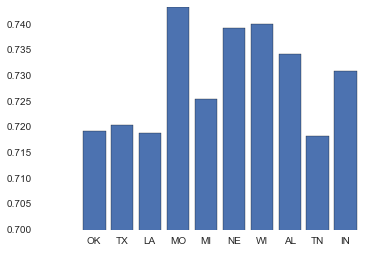

In [9]:
%matplotlib inline

import operator
import matplotlib.pyplot as plt
import seaborn as sns


sorted_state_scores = sorted(venue_state_scores.items(), key=operator.itemgetter(1))
top_ten = sorted_state_scores[-10:][::-1]

top_ten = dict(top_ten)
plt.bar(np.arange(len(top_ten)), top_ten.values(), align='center')
plt.xticks(np.arange(len(top_ten)), top_ten.keys())
ymax = max(top_ten.values())
plt.ylim(0.700, ymax)
plt.show()